**1. Generating RandomNetworks**


In [1]:
install.packages("igraph")
install.packages("Matrix")
install.packages("pracma")
install.packages("resample")
library("igraph")
library("Matrix")
library("pracma")
library("resample")   

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




1. Create random networks using ER model

  1.1.(a) Create undirected random networks


[1] "the probability of nodes' degree =  0.002"
[1] "the mean of nodes' degree =  1.85555555555556"
[1] "the variance of nodes' degree =  1.97466320603139"



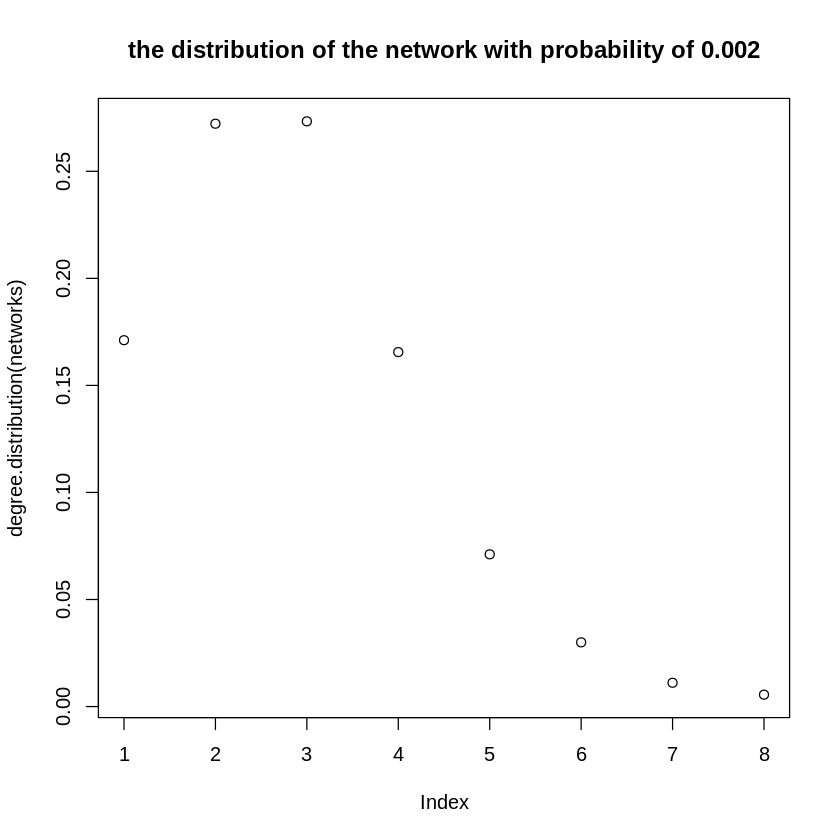


[1] "the probability of nodes' degree =  0.006"
[1] "the mean of nodes' degree =  5.48666666666667"
[1] "the variance of nodes' degree =  5.46033370411568"



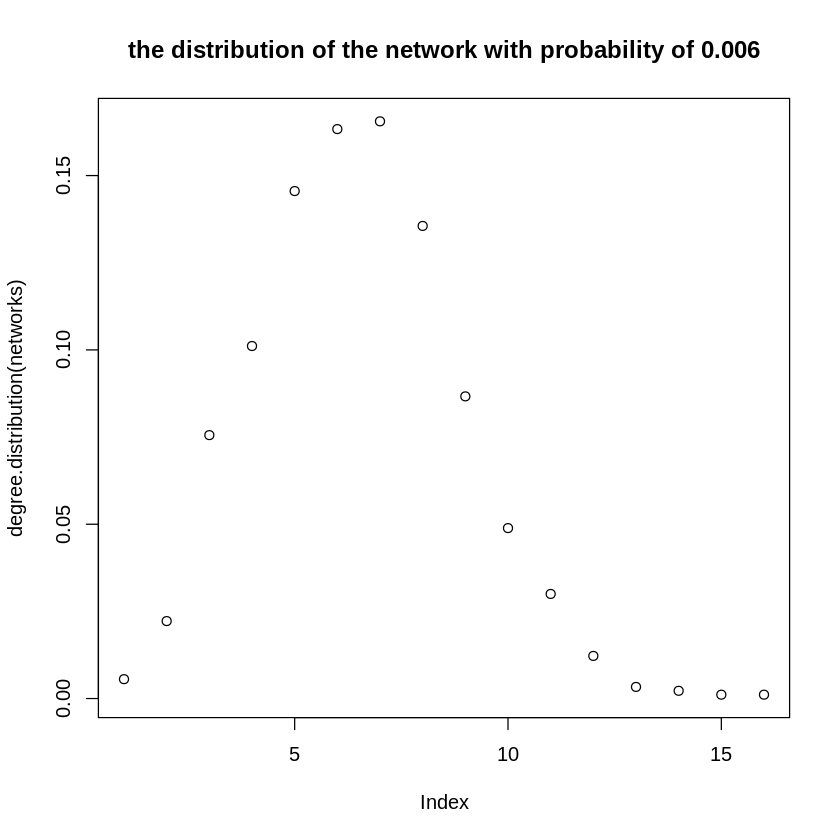


[1] "the probability of nodes' degree =  0.012"
[1] "the mean of nodes' degree =  10.7333333333333"
[1] "the variance of nodes' degree =  10.9432703003337"



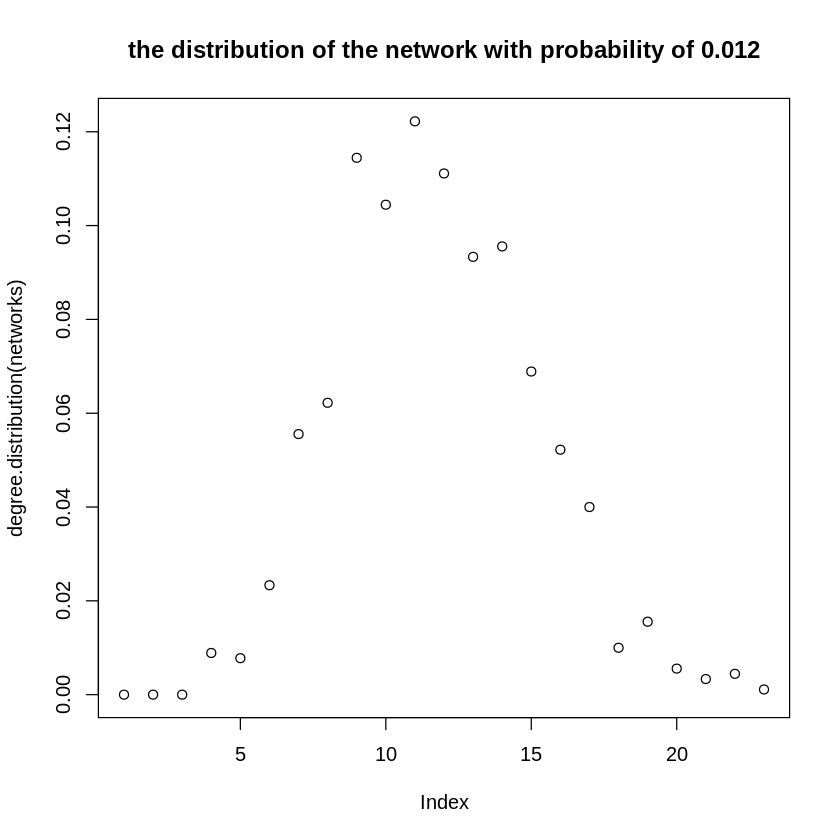


[1] "the probability of nodes' degree =  0.045"
[1] "the mean of nodes' degree =  40.7266666666667"
[1] "the variance of nodes' degree =  36.5080756395996"



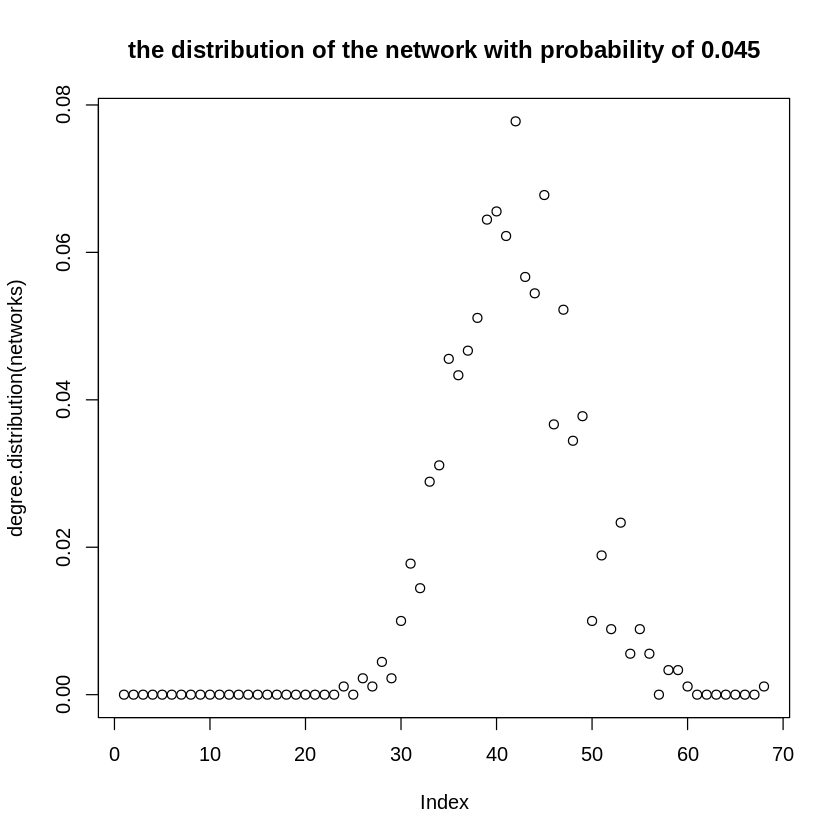


[1] "the probability of nodes' degree =  0.1"
[1] "the mean of nodes' degree =  90.3155555555556"
[1] "the variance of nodes' degree =  78.3986454084786"



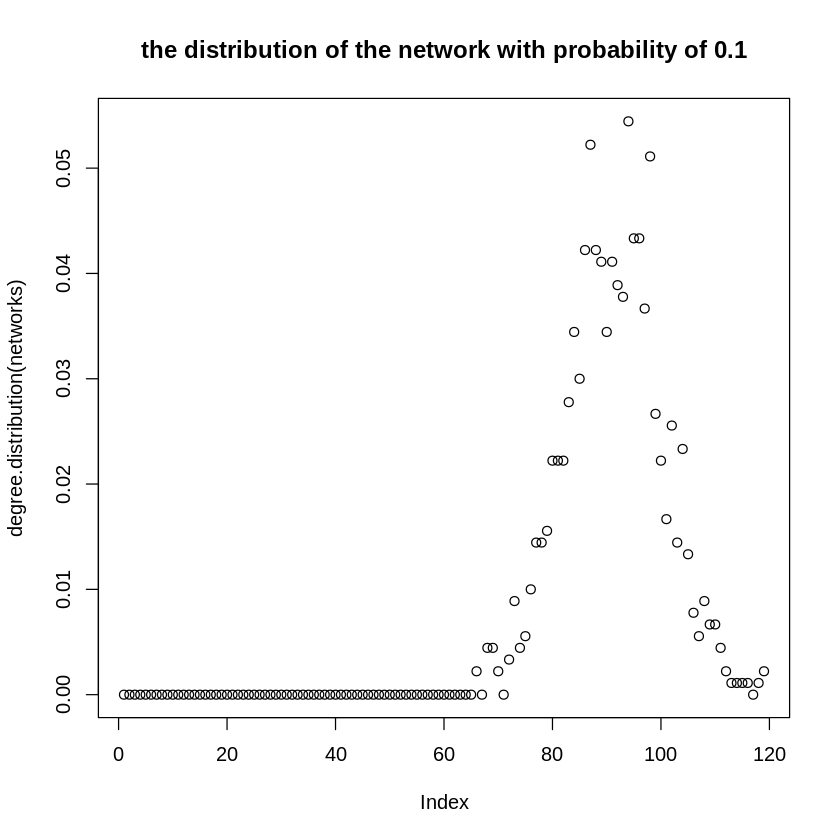

In [2]:
# the number of the nodes
n = 900

# the probability p for drawing edge
probabilities <- c(0.002, 0.006, 0.012, 0.045, 0.1)

# calculate the mean and variance of nodes' degree 
for (pp in probabilities)
{
  # generate the network
  networks = sample_gnp(n, pp)
 
  # plot the distribution of nodes' degree in network
  plot(degree.distribution(networks), main = paste("the distribution of the network with probability of", pp))
 
  cat(sep="\n")
 
  print(paste("the probability of nodes' degree = ", pp))
 
  # calculate the mean of nodes' degree in the network
  print(paste("the mean of nodes' degree = ", mean(degree(networks))))
 
  # calculate the variance of nodes' degree in the network
  print(paste("the variance of nodes' degree = ", var(degree(networks))))
 
  cat(sep="\n")
}


  1.1.(b) Estimate the probability that a generated network is connected; Find the giant connected component (GCC)

In [ ]:
# the number of the nodes
n = 900

# the probability p for drawing edge
probabilities <- c(0.002, 0.006, 0.012, 0.045, 0.1)

for (pp in probabilities)
{
  cat(sep="\n")

  # generate the network
  networks = sample_gnp(n, pp)
  
  print(paste("the probability of nodes' degree = ", pp))

  # obtain the community number and community size for each community
  cluster_components = clusters(networks)

  # obtain the max community size among all community 
  max_size = which.max(cluster_components$csize)

  # obtain the giant connected component (GCC)
  network_GCC = induced.subgraph(networks, which(cluster_components$membership == max_size))

  # obtain the diameter fo the GCC
  diameter_GCC = diameter(network_GCC)

  print(paste("the diameter of the giant connected component(GCC) is", diameter_GCC))
  print(paste("the size of the giant connected component(GCC) is", vcount(network_GCC)))

  # calculate the probability of the generated network is connected
  # initialize the number of connect
  number_connect = 0
  for (elements in 1:1000)
  {
    # generate a temporary network for calculation
    networks_temp = sample_gnp(n, pp)

    # judge whether the network is connected
    if (is.connected(networks_temp))
    {
      number_connect = number_connect + 1
    }
  }

  print(paste("the probability of the generated network is connected in 1000 cases", number_connect/1000))

  cat(sep="\n")

}



[1] "the probability of nodes' degree =  0.002"
[1] "the diameter of the giant connected component(GCC) is 25"
[1] "the size of the giant connected component(GCC) is 650"
[1] "the probability of the generated network is connected in 1000 cases 0"


[1] "the probability of nodes' degree =  0.006"
[1] "the diameter of the giant connected component(GCC) is 8"
[1] "the size of the giant connected component(GCC) is 895"
[1] "the probability of the generated network is connected in 1000 cases 0.012"


[1] "the probability of nodes' degree =  0.012"
[1] "the diameter of the giant connected component(GCC) is 5"
[1] "the size of the giant connected component(GCC) is 900"
[1] "the probability of the generated network is connected in 1000 cases 0.979"


[1] "the probability of nodes' degree =  0.045"
[1] "the diameter of the giant connected component(GCC) is 3"
[1] "the size of the giant connected component(GCC) is 900"
[1] "the probability of the generated network is connected in 1000 cases 1"


1.1.(c) Empirically estimate the value of p

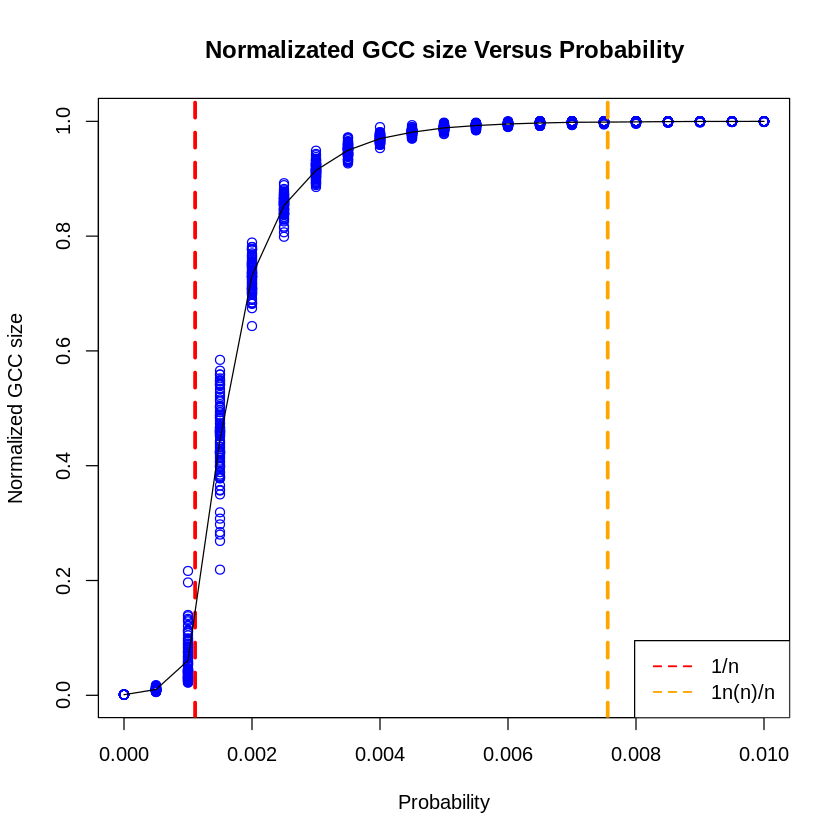

In [ ]:
# the number of the nodes
n = 900

# generate the max probability
pmax = 0.01

# generate the range fo the probability p for drawing edge
probabilities <- seq(from=0.000, to=pmax, by=0.0005)

# the vector to store the normalization GCC size's mean value
GCC_size_mean_vecotr <- c()

# the vector to store the normalization GCC size 
GCC_size_vector <- c()

# the vector to store the probability for each network
probabilities_vector <- c()

for (pp in probabilities) 
{
  # initialize the size 
  temp_size = 0

  for (iter in 1:100)
  {
    # generate the network
    networks = sample_gnp(n, pp)
    
    # obtain the community number and community size for each community
    cluster_components = clusters(networks)
    
    # obtain the max community size among all community 
    max_size = which.max(cluster_components$csize)
    
    # obtain the giant connected component (GCC)
    network_GCC = induced.subgraph(networks, which(cluster_components$membership == max_size))
    
    # store the probability for corresponding probabitity and iteration
    probabilities_vector = c(probabilities_vector, pp)  

    # store the GCC size for corresponding probabitity and iteration
    GCC_size_vector = c(GCC_size_vector, vcount(network_GCC)/900)

    # calculate the total value of the size with 100 iteration with corresponding probability
    temp_size = temp_size + vcount(network_GCC)/900  
  }
  # calculate the mean of the size with 100 random network with corresponding probability
  GCC_size_mean_vecotr <- c(GCC_size_mean_vecotr,(temp_size/100))  
  
}
plot(probabilities_vector, GCC_size_vector,col='blue', main='Normalizated GCC size Versus Probability', xlab = 'Probability', ylab = 'Normalized GCC size')
abline(v = 1/n, col="red", lwd=3, lty=2)
abline(v = log(n)/n, col="orange", lwd=3, lty=2)
lines(probabilities,GCC_size_mean_vecotr)
legend("bottomright", legend=c("1/n", "1n(n)/n"), col=c("red", "orange"), lwd=1.5, lty = 2:2, cex=1)


1.1.(d) i. Define the average degree 

In [ ]:
# generate a function for calculate the expected size of the GCC
expect_size_GCC <- function(probability, numberNodes, iteration)
{
  # initialize the size 
  total_size = 0
  
  for (ii in 1:iteration)
  {
    # generate the network
    networks = sample_gnp(numberNodes, probability)

    # obtain the community number and community size for each community
    cluster_components = clusters(networks)
    
    # obtain the max community size among all community 
    max_size = which.max(cluster_components$csize)
    
    # obtain the giant connected component (GCC)
    network_GCC = induced.subgraph(networks, which(cluster_components$membership == max_size))

    # calculate the total value of the size with 100 iteration with corresponding probability
    total_size = total_size + vcount(network_GCC)  
  }
  return(total_size/iteration)
}

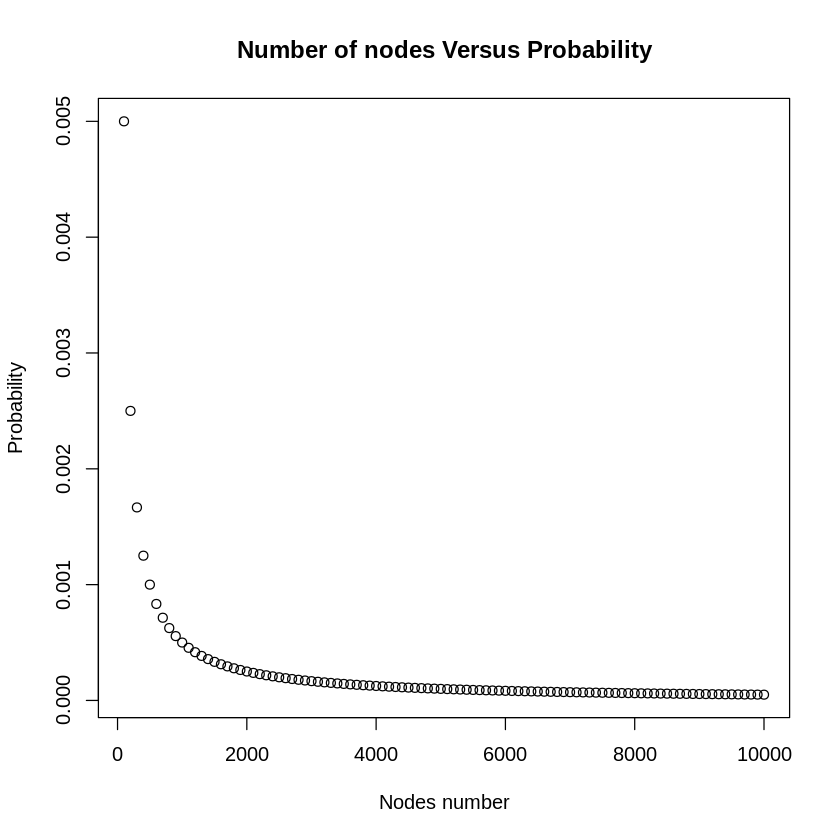

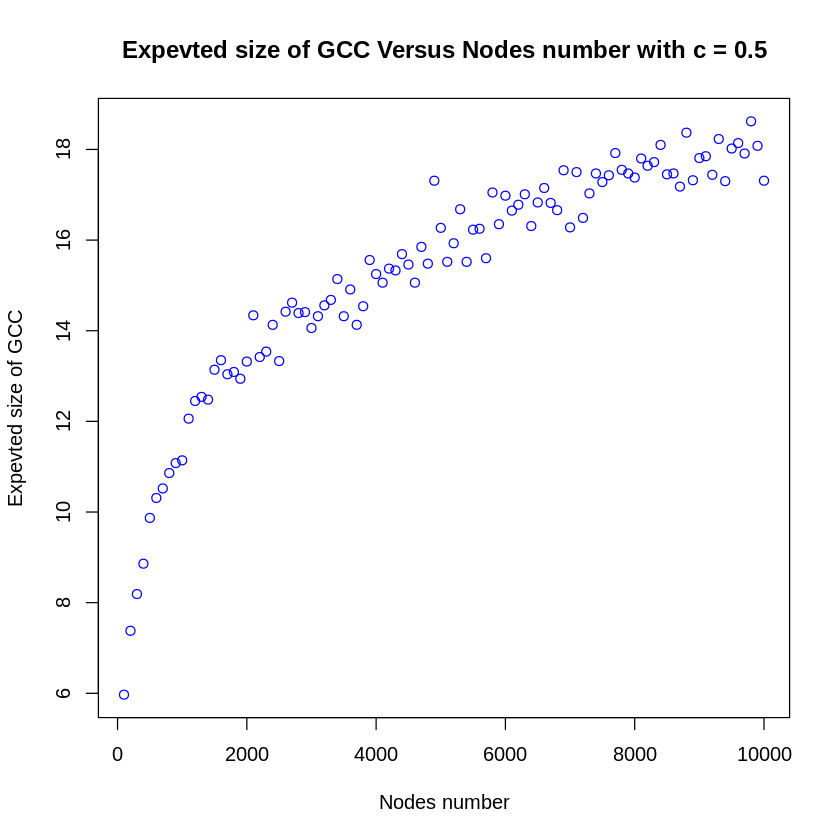

In [ ]:
# generate the c of question
c = 0.5

# generate the ranging of nodes' number
numberNodes <- seq(from=100, to=10000, by=100)

# generate the ranging probability 
probabilities <- c/numberNodes

plot(numberNodes, probabilities, main = 'Number of nodes Versus Probability', xlab = 'Nodes number', ylab ='Probability')

# the vector to store the GCC size's mean value
GCC_size_mean_vecotr <- c()

for(ii in 1:length(numberNodes))
{
  # store the GCC size for corresponding probabitity and iteration
  GCC_size_mean_vecotr <- c(GCC_size_mean_vecotr, expect_size_GCC(probabilities[ii], numberNodes[ii], 100))
}

plot(numberNodes, GCC_size_mean_vecotr, col='blue', main='Expevted size of GCC Versus Nodes number with c = 0.5', xlab = 'Nodes number', ylab = 'Expevted size of GCC')


1.1.(d) ii. Define the average degree 

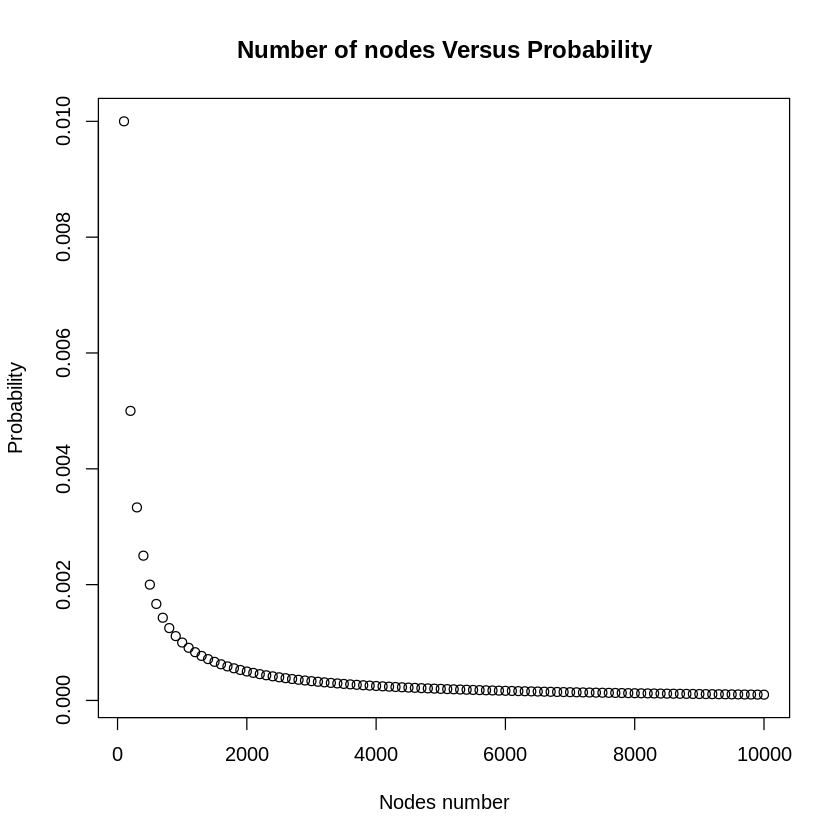

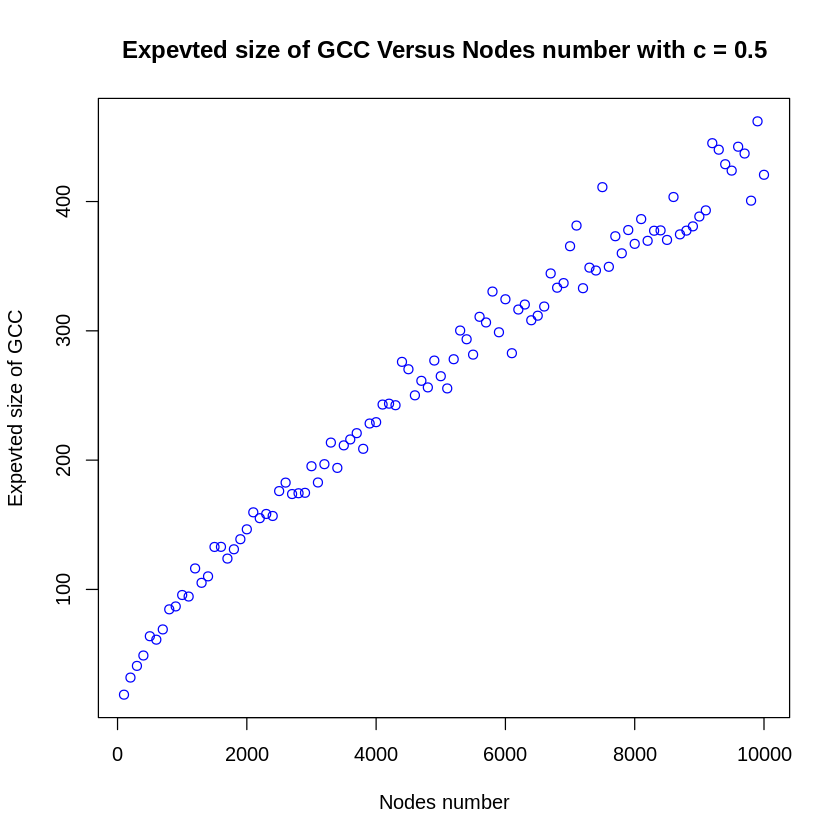

In [ ]:
# generate the c of question
c = 1

# generate the ranging of nodes' number
numberNodes <- seq(from=100, to=10000, by=100)

# generate the ranging probability 
probabilities <- c/numberNodes

plot(numberNodes, probabilities, main = 'Number of nodes Versus Probability', xlab = 'Nodes number', ylab ='Probability')

# the vector to store the GCC size's mean value
GCC_size_mean_vecotr <- c()

for(ii in 1:length(numberNodes))
{
  # store the GCC size for corresponding probabitity and iteration
  GCC_size_mean_vecotr <- c(GCC_size_mean_vecotr, expect_size_GCC(probabilities[ii], numberNodes[ii], 100))
}

plot(numberNodes, GCC_size_mean_vecotr, col='blue', main='Expevted size of GCC Versus Nodes number with c = 0.5', xlab = 'Nodes number', ylab = 'Expevted size of GCC')


1.1.(d) iii. Define the average degree 

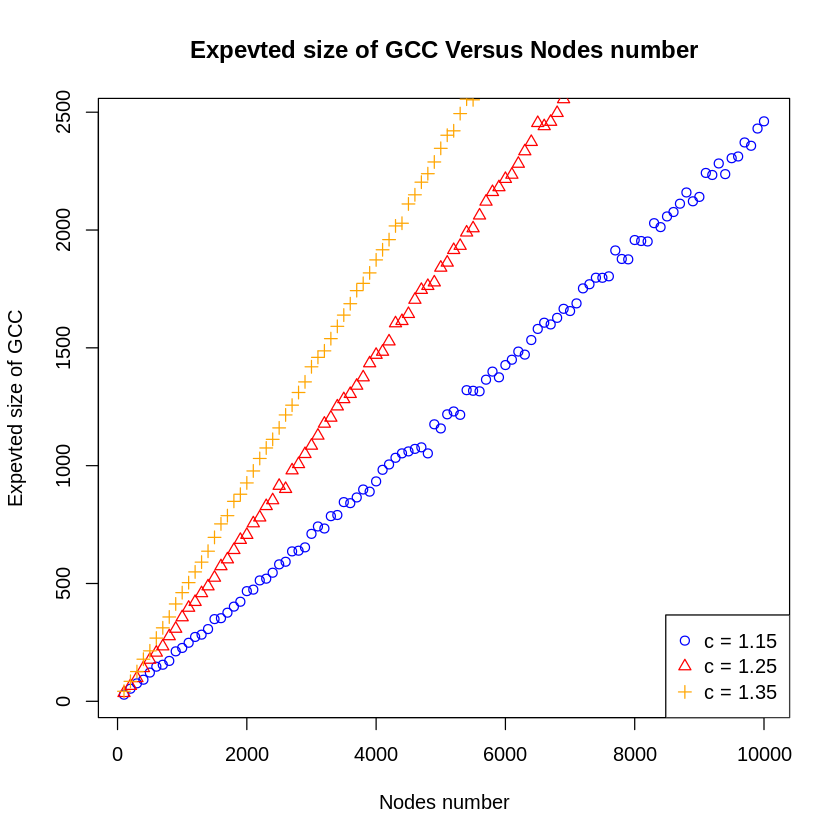

In [ ]:
# generate the c of question
c <- c(1.15, 1.25, 1.35)

for(cc in c)
{
  # generate the ranging of nodes' number
  numberNodes <- seq(from=100, to=10000, by=100)

  # generate the ranging probability 
  probabilities <- cc/numberNodes

  # the vector to store the GCC size's mean value
  GCC_size_mean_vecotr <- c()

  for(ii in 1:length(numberNodes))
  {
    # store the GCC size for corresponding probabitity and iteration
    GCC_size_mean_vecotr <- c(GCC_size_mean_vecotr, expect_size_GCC(probabilities[ii], numberNodes[ii], 100))
  }
  if(cc == 1.15)
  {
    plot(numberNodes, GCC_size_mean_vecotr, pch=1, col='blue', main='Expevted size of GCC Versus Nodes number', xlab = 'Nodes number', ylab = 'Expevted size of GCC')
  }
  if(cc == 1.25)
  {
    points(numberNodes, GCC_size_mean_vecotr, pch=2, col = 'red')
  }
  if(cc == 1.35)
  {
    points(numberNodes, GCC_size_mean_vecotr, pch=3, col = 'orange')
  }
  
}
legend("bottomright", legend=c("c = 1.15", "c = 1.25", "c = 1.35"), col=c("blue", "red", "orange"), pch=c(1,2,3))



1.3  Create a modified preferential attachment model that penalizes the age of a node

1.3.(a) 

[1] "the slope and intercept of the linear regression"

Call:
lm(formula = log_pro ~ log_deg)

Coefficients:
(Intercept)      log_deg  
      2.744       -3.800  




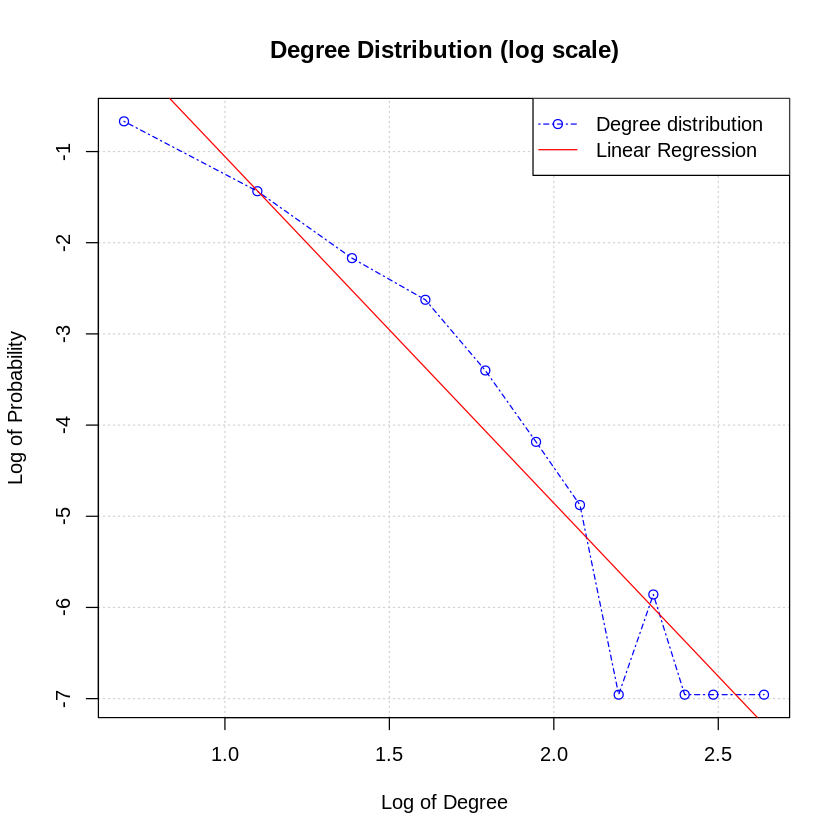

In [ ]:
 # set the parameter for the modified preferential attachment model with penalization for the age of a node
 # the number of nodes
 numberNodes = 1050

 # the m links to old vertices
 mLinks = 1

 # the parameter for the pealization for the age of a node
 alpha = 1
 beta = -1
 a = c = d = 1
 b = 0

# generate the network or graph (directed = FALSE is undirected network)
networks = sample_pa_age(directed = FALSE, n = numberNodes, m = mLinks, pa.exp = alpha, aging.exp = beta, zero.deg.appeal = a,
                         zero.age.appeal = b, deg.coef = c, age.coef = d, aging.bin = n)

# obtain the distribution of degree for each node in network
dist_of_deg = degree.distribution(networks)

# calculate the log of the distribution of the degree
# first we have to remove the probability, which is equal to 0
x_pos = which(dist_of_deg > 0, arr.ind = TRUE)
# calculate the log of degree
log_deg = log(seq(1:length(dist_of_deg)))[x_pos]
# calculate the log of probability or distribution
log_pro = log(dist_of_deg)[x_pos]

# calculate the linear regression
line_reg = lm(log_pro ~ log_deg)
print("the slope and intercept of the linear regression")
print(line_reg)
cat(sep="\n")

# plot the degree and the linear regression
# plot the distribution of degree in log scale
plot(log_deg, log_pro, grid(), col = 'blue', main="Degree Distribution (log scale)", xlab="Log of Degree", ylab="Log of Probability")
lines(log_deg, log_pro, col = 'blue', lty=10)

# plot the linear regression
abline(line_reg, col = 'red', lwd = 1)

legend('topright', legend = c("Degree distribution","Linear Regression"), lty = c(10,1), lwd = c(1,1), pch=c(1,NA), col = c('blue','red'))


1.3.(b) Use fast greedy method to find the community structure

[1] "the modularity of the network 0.937117014615579"


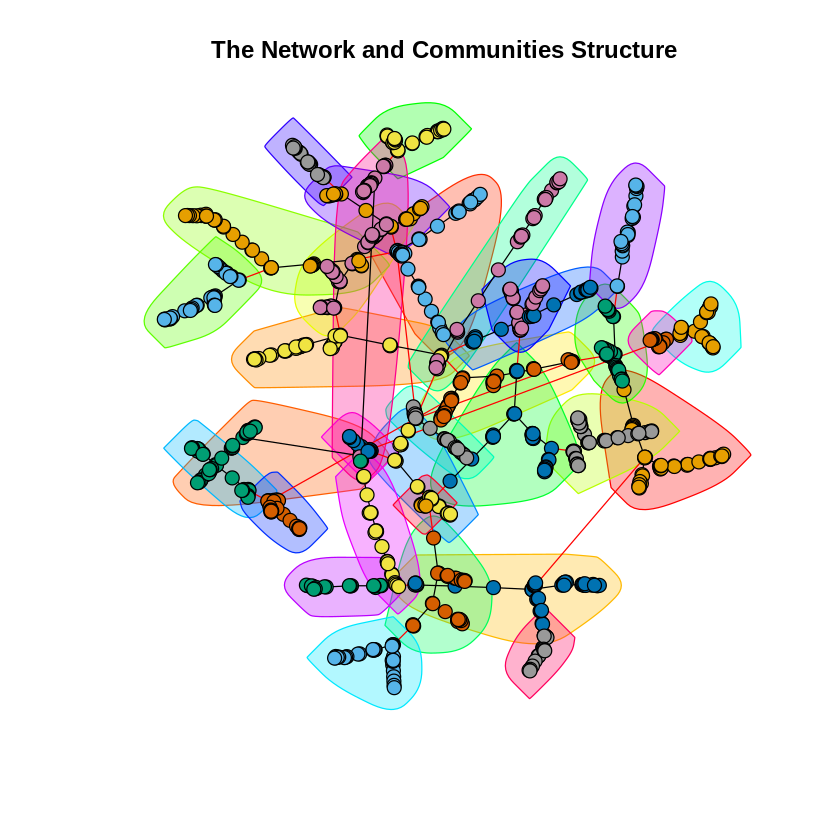

In [ ]:
# find the clusters or communities structure through fast greedy
network_communities = cluster_fast_greedy(networks)

# obtain the size of each communities
communities_size = sizes(network_communities)

# obtain the modularity of the network
net_modular = modularity(network_communities)
print(paste("the modularity of the network", net_modular))

# plot the structure of the network and the community
plot(network_communities, networks, vertex.size = 5, vertex.label=NA, main = 'The Network and Communities Structure')




**2. Random Walk on Networks**

1. Random walk on ER networks

  2.1.(a) Create an undirected random network with 900 nodes

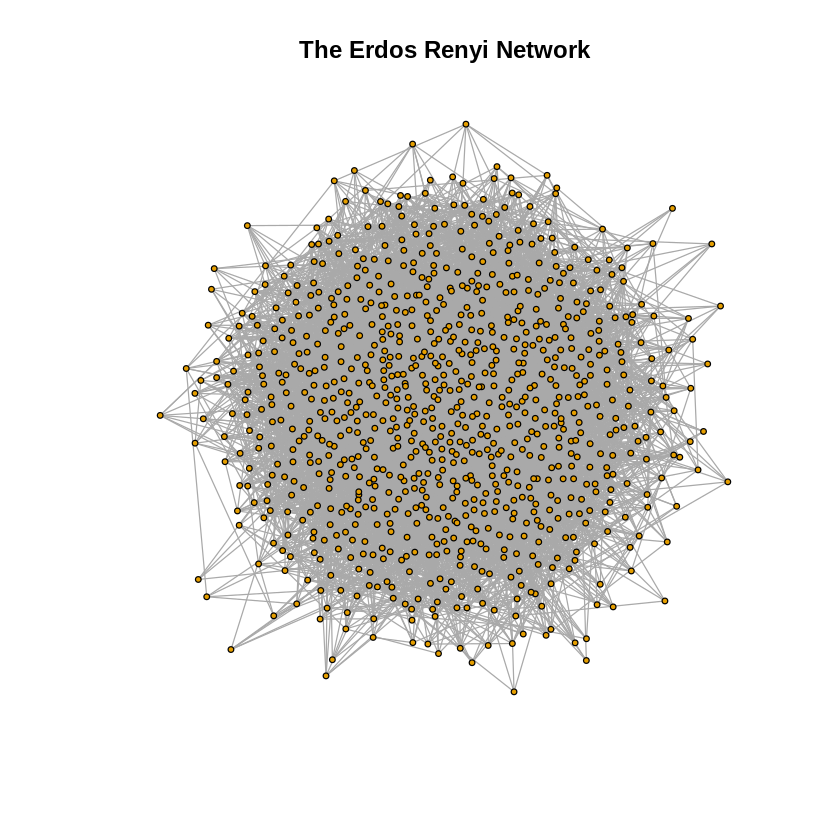

In [ ]:
# set the parameter for the modified preferential attachment model with penalization for the age of a node
# the number of nodes
numberNodes = 900

# the probability of connecting
probabilities = 0.015

# generate the network or graph 
networks = sample_gnp(numberNodes, probabilities, directed=F)

# Plot network
plot(networks, vertex.size=2, vertex.label=NA, main = "The Erdos Renyi Network")

  2.1.(b) 

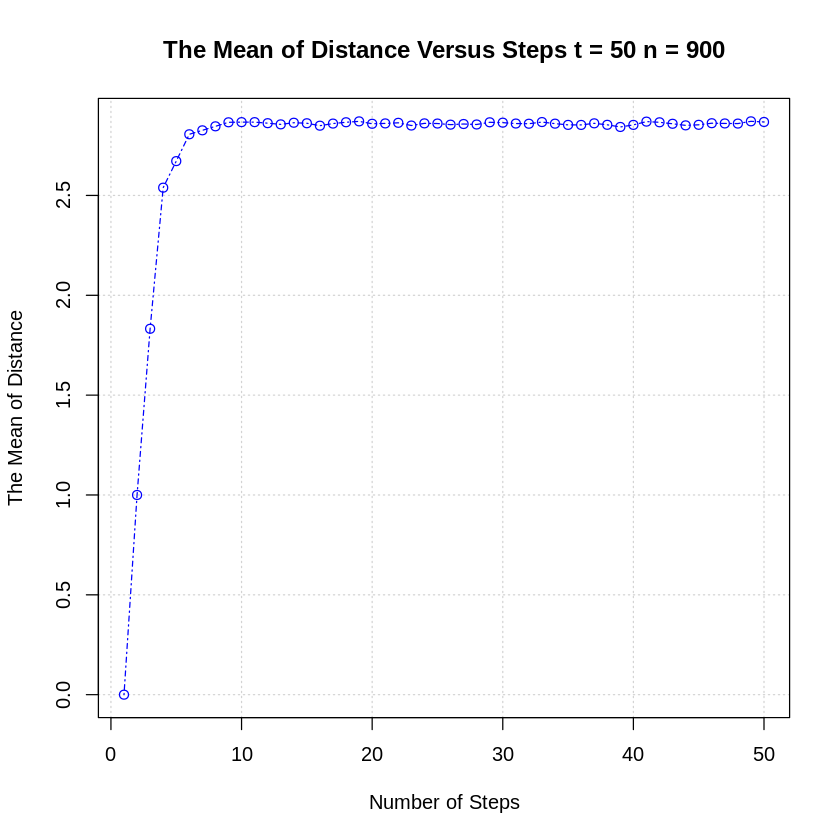

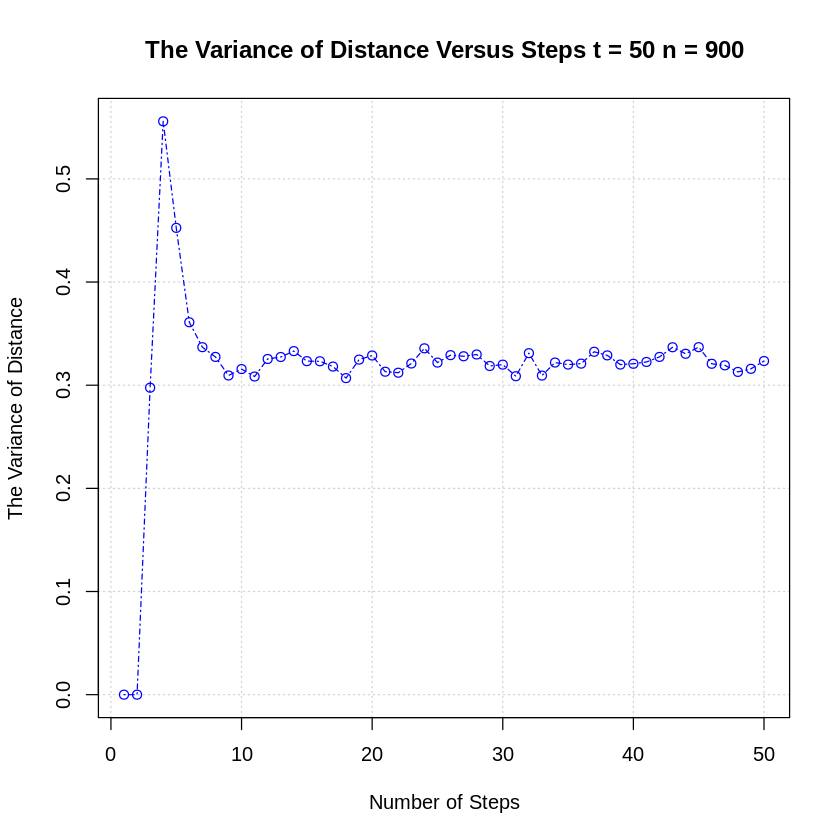

In [ ]:
# set the parameter for the random walk in ER
# the number of steps
tSteps = 50
# set the total iteration number
iterations = 5000

# calculate the s(t) the distance
# initialize the matrix for s(t)
st = matrix(data = 0, nrow = iterations, ncol = tSteps)
# initialize the array for the degree of the end node
degreeEnd = array(data = 0, dim = iterations)

# use iteration to calculate the mean and variance
for (ii in 1:iterations)
{
  # find the GCC to guarantee the walk can happen
  if(is_connected(networks)) network_GCC = networks
  else
  {
    # obtain the community number and community size for each community
    cluster_components = clusters(networks)

    # obtain the max community size among all community 
    max_size = which.max(cluster_components$csize)

    # obtain the giant connected component (GCC)
    network_GCC = induced.subgraph(networks, which(cluster_components$membership == max_size))
  }

  # start the random walk (initialize the start point)
  startPoint = sample(V(network_GCC),1)

  # obtain the walk notes during the random walk
  walkNodes = random_walk(network_GCC, startPoint, tSteps)

  # obtain the distance s(t) for each iteration
  st[ii,] = shortest.paths(network_GCC, walkNodes, startPoint)

  # obtain the degree of the end point
  degreeEnd[ii] = degree(network_GCC, walkNodes[tSteps])
}

# plot the mean vesus the steps
plot(seq(1,tSteps,1), colMeans(st), grid(), col = 'blue', main=sprintf("The Mean of Distance Versus Steps t = %d n = %d", tSteps, numberNodes), xlab = 'Number of Steps', ylab = 'The Mean of Distance')
lines(lowess(seq(1,tSteps,1), colMeans(st), f = 0.003), col = 'blue', lty = 10)

# plot the variance vesus the steps
plot(seq(1,tSteps,1), colVars(st), grid(), col = 'blue', main=sprintf("The Variance of Distance Versus Steps t = %d n = %d", tSteps, numberNodes), xlab = 'Number of Steps', ylab = 'The Variance of Distance')
lines(lowess(seq(1,tSteps,1), colVars(st), f = 0.003), col = 'blue', lty = 10)



  2.2.(c) the degree distribution

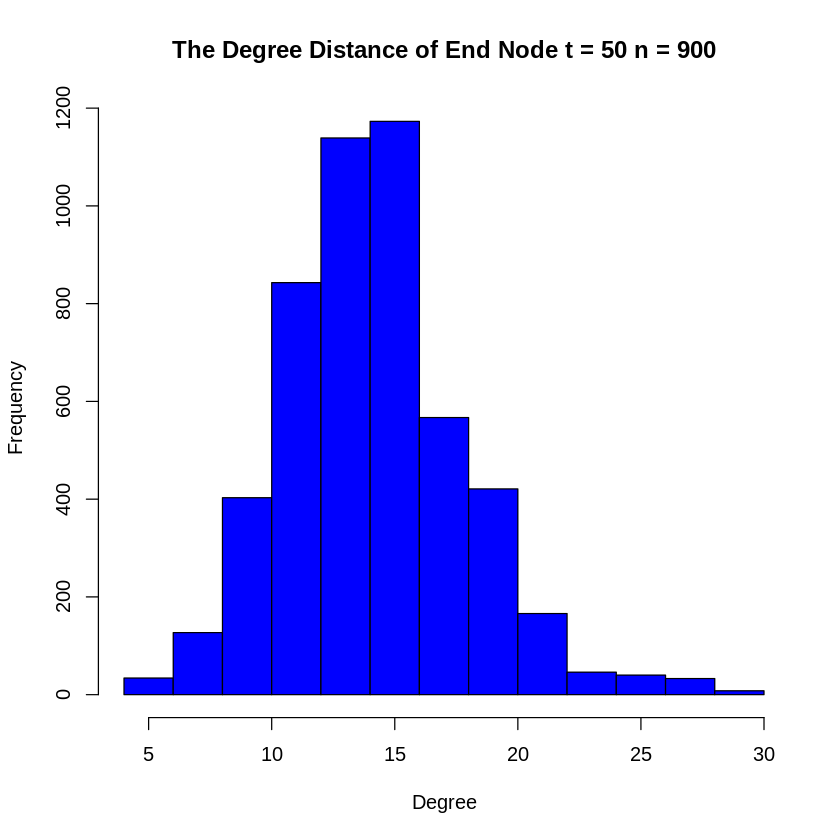

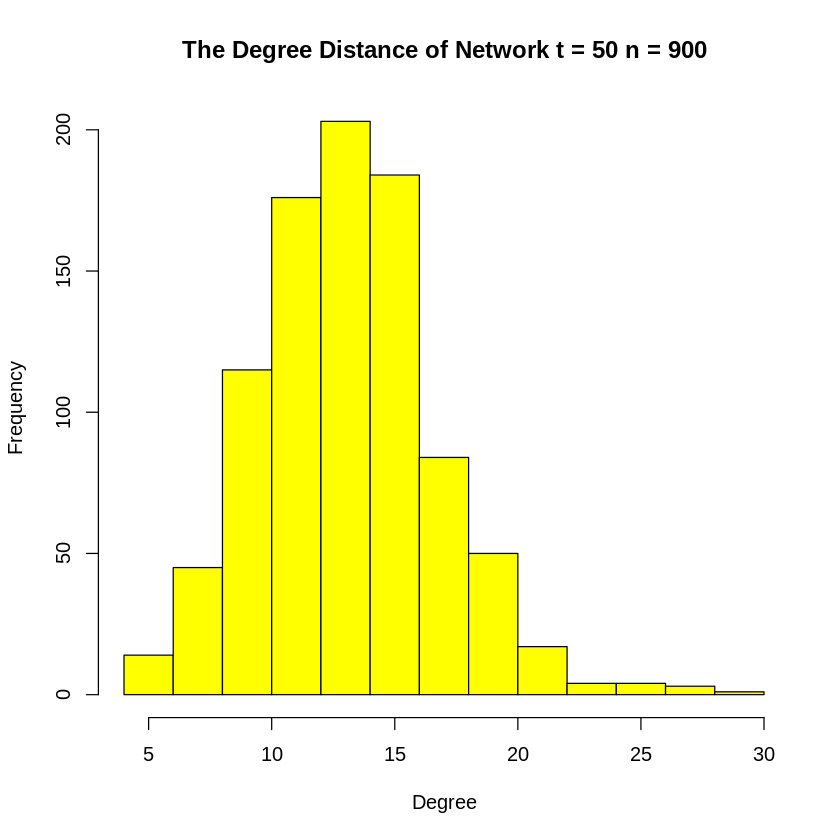

In [ ]:
# plot the degree of the end node of random walk
hist(degreeEnd, col = 'blue', main=sprintf("The Degree Distance of End Node t = %d n = %d", tSteps, numberNodes), xlab = 'Degree', ylab = 'Frequency')

# plot the degree of the end node of random walk
hist(degree(network_GCC), col = 'yellow', main=sprintf("The Degree Distance of Network t = %d n = %d", tSteps, numberNodes), xlab = 'Degree', ylab = 'Frequency')


  2.1.(d) 

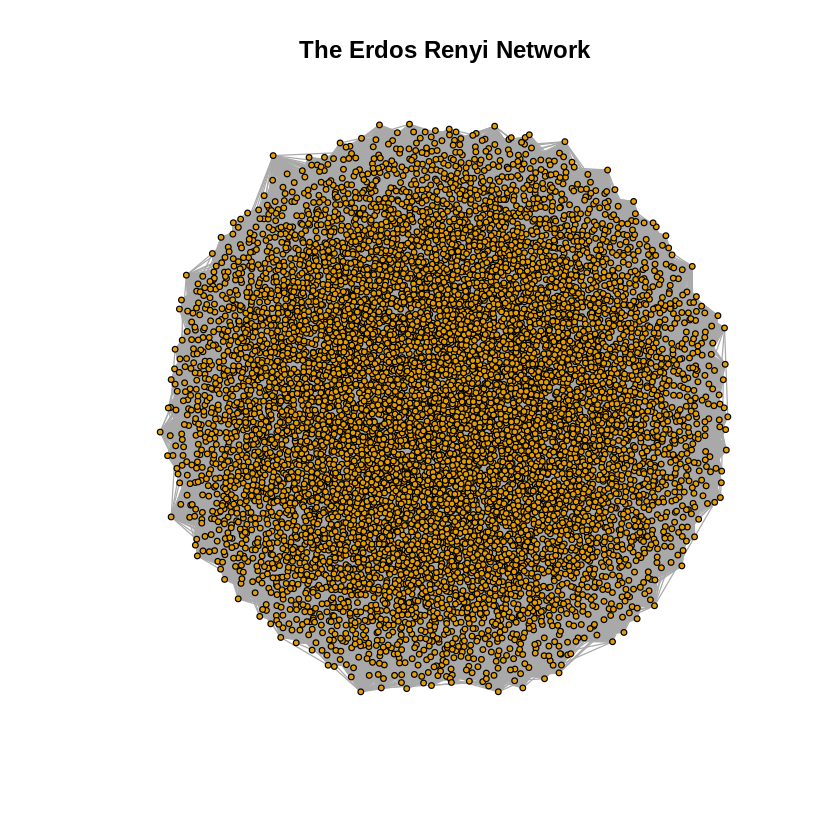

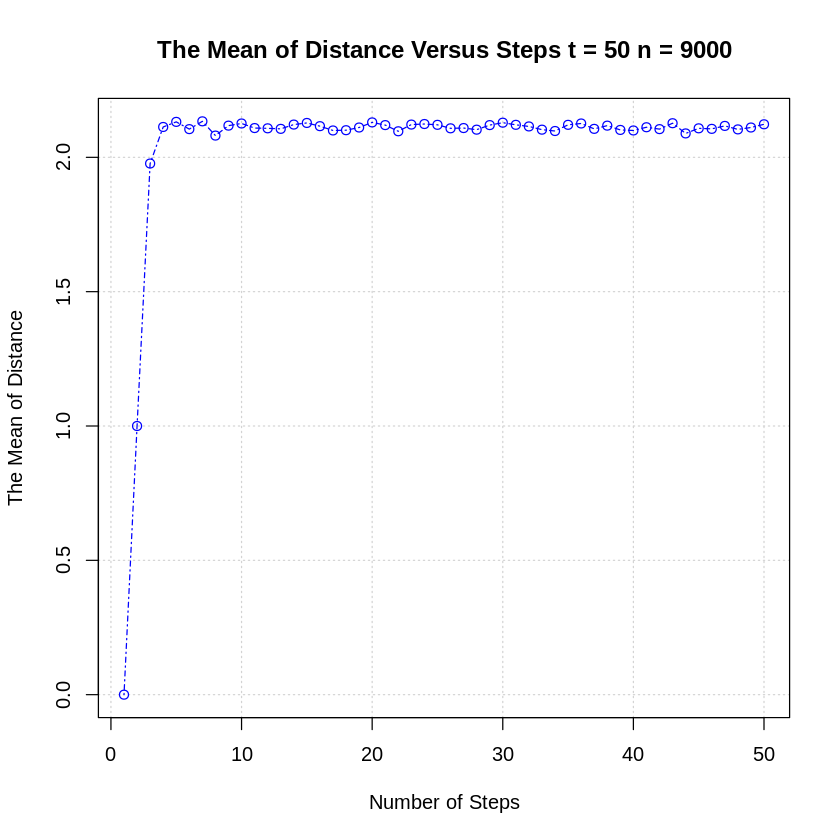

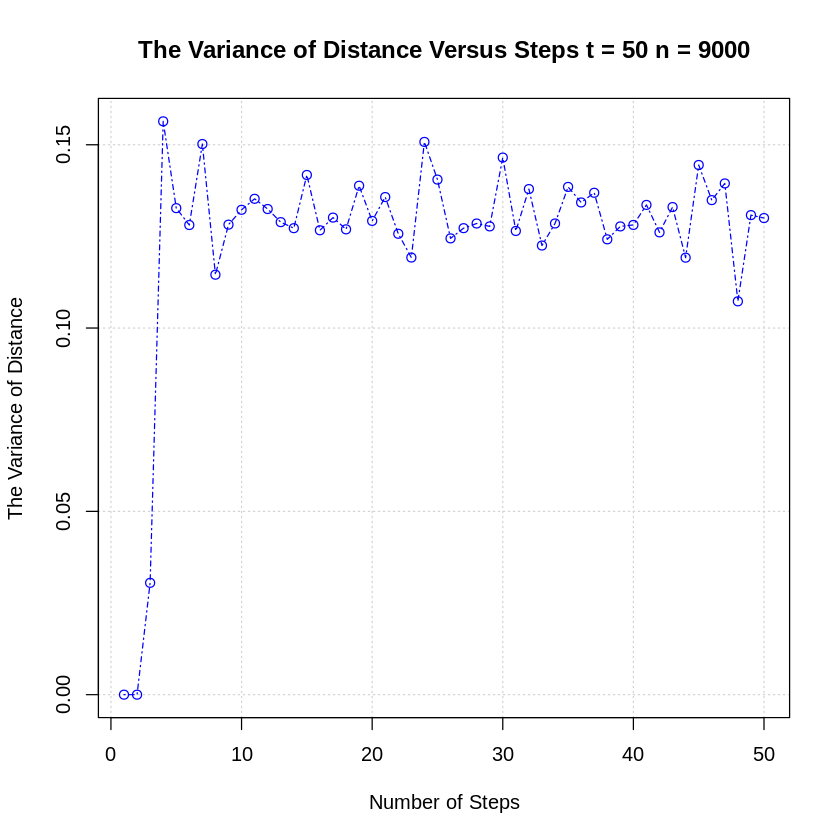

In [ ]:
# set the parameter for the random walk in ER
# the number of nodes
numberNodes = 9000
# the number of steps
tSteps = 50
# set the total iteration number
iterations = 1000

# the probability of connecting
probabilities = 0.015

# generate the network or graph 
networks = sample_gnp(numberNodes, probabilities, directed=F)

# Plot network
plot(networks, vertex.size=2, vertex.label=NA, main = "The Erdos Renyi Network")

# calculate the s(t) the distance
# initialize the matrix for s(t)
st = matrix(data = 0, nrow = iterations, ncol = tSteps)
# initialize the array for the degree of the end node
degreeEnd = array(data = 0, dim = iterations)

# use iteration to calculate the mean and variance
for (ii in 1:iterations)
{
  # find the GCC to guarantee the walk can happen
  if(is_connected(networks)) network_GCC = networks
  else
  {
    # obtain the community number and community size for each community
    cluster_components = clusters(networks)

    # obtain the max community size among all community 
    max_size = which.max(cluster_components$csize)

    # obtain the giant connected component (GCC)
    network_GCC = induced.subgraph(networks, which(cluster_components$membership == max_size))
  }

  # start the random walk (initialize the start point)
  startPoint = sample(V(network_GCC),1)

  # obtain the walk notes during the random walk
  walkNodes = random_walk(network_GCC, startPoint, tSteps)

  # obtain the distance s(t) for each iteration
  st[ii,] = shortest.paths(network_GCC, walkNodes, startPoint)

  # obtain the degree of the end point
  degreeEnd[ii] = degree(network_GCC, walkNodes[tSteps])
}

# plot the mean vesus the steps
plot(seq(1,tSteps,1), colMeans(st), grid(), col = 'blue', main=sprintf("The Mean of Distance Versus Steps t = %d n = %d", tSteps, numberNodes), xlab = 'Number of Steps', ylab = 'The Mean of Distance')
lines(lowess(seq(1,tSteps,1), colMeans(st), f = 0.003), col = 'blue', lty = 10)

# plot the variance vesus the steps
plot(seq(1,tSteps,1), colVars(st), grid(), col = 'blue', main=sprintf("The Variance of Distance Versus Steps t = %d n = %d", tSteps, numberNodes), xlab = 'Number of Steps', ylab = 'The Variance of Distance')
lines(lowess(seq(1,tSteps,1), colVars(st), f = 0.003), col = 'blue', lty = 10)


4.Personalized PageRank
    
  2.4.(a)  

In [4]:
# Generate the preferential attachment network 
# the number of nodes
numberNodes = 900

# the m links to old vertices
mLinks = 4

# create 2 random directed preferential attachment network
network_first = sample_pa(numberNodes, m = mLinks, directed = TRUE)
network_second = sample_pa(numberNodes, m = mLinks, directed = TRUE)

# create a array for shuffling the second network
nodePos = seq(from = 1, to = numberNodes, by = 1)

# shuffling the node position
nodePos = sample(nodePos)

# ensure the first one is not the first node generate in the second network
while(nodePos[1] == 1)
{
  nodePos = sample(nodePos)
}

# shuffling the second network
network_second = permute(network_second, nodePos)

# obtaint the edge of the second network
network_second_edge_list  = as.vector(t(as_edgelist(network_second)))

# generate the network we need by merging the second edge to the first network
networks = add_edges(network_first, network_second_edge_list)


In [5]:
# the function for generate the transition matrix for the random walk without teleportation
generate_transition_matrix = function(networks)
{
  # the network of input should be connect without isolation node
  # obtain the number of node in the network
  numberNodes = vcount(networks)

  # obtain the adjacency matrix of the network
  adjacency_matrix = as_adjacency_matrix(networks)

  # if the user is using the function for networks with isolated nodes then creating self connected edges
  adjacency_matrix[diag(rowSums(adjacency_matrix) == 0)] = 1

  # obtain the out degree for each node
  nodeDegree = matrix(rowSums(adjacency_matrix,,1))

  # normalize the adjacency matrix to obtain the transition matrix without teleportation
  transition_matrix = adjacency_matrix/repmat(nodeDegree, 1, numberNodes)

  return(transition_matrix)
}

In [6]:
# the function of the random walk
random_walk_pageRank = function(networks, numberStep, startNode, transition_matrix, pageRank, alpha = 0.2)
{
  # initialize the current node
  tempNode = startNode

  # begin the random walk
  for(ii in 1:numberStep)
  {
    transition_vector = (1-alpha)*transition_matrix[tempNode,] + alpha*pageRank

    # the random walk 
    tempNode = sample(1:vcount(networks), 1, prob = transition_vector)
  }
  return(tempNode)
}



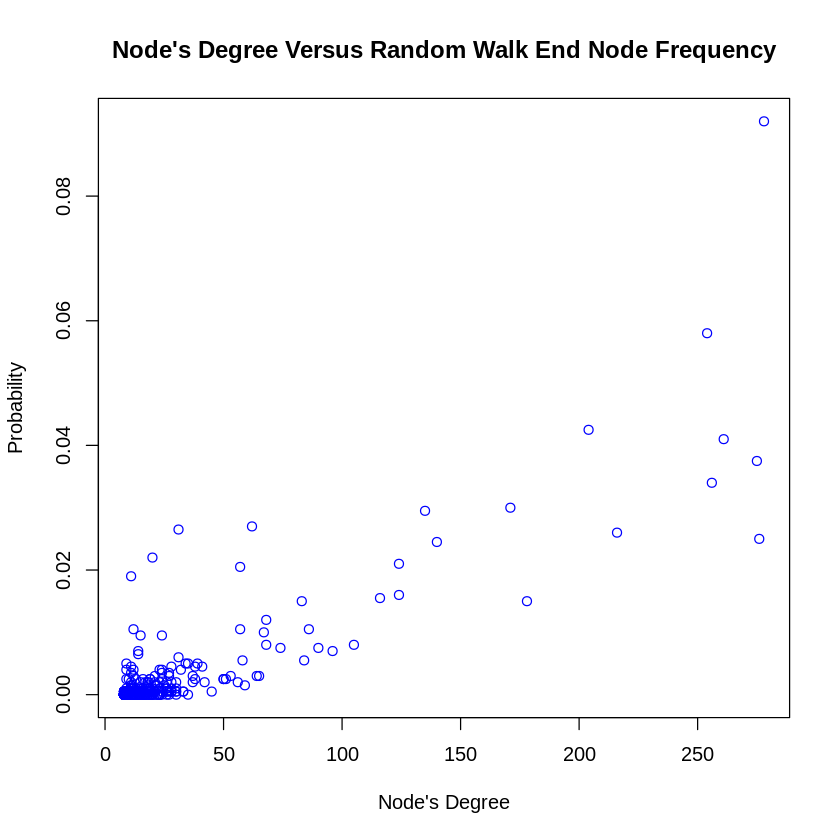

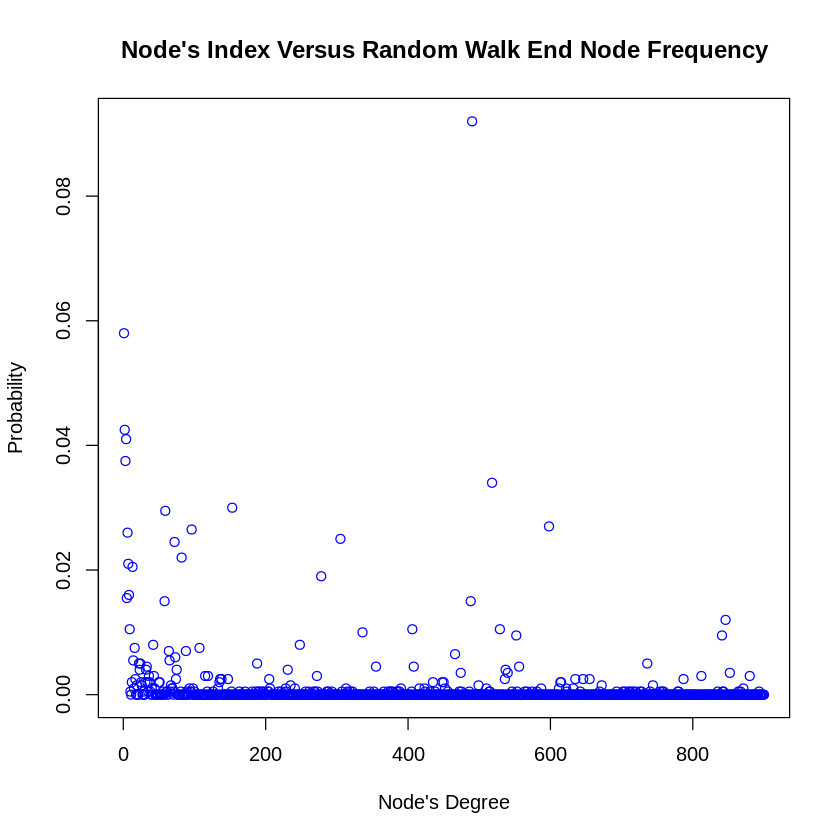

In [7]:
# obtain the page rank of the network
temp_pageRank = as.numeric(unlist(page_rank(networks)))
pageRank = temp_pageRank[1:vcount(networks)]

# initialize the frequency array
freqMap = numeric(vcount(networks))

# initialize the iteration number and step number
iterations = 2000
numberStep = 2000

for(ii in 1:iterations)
{
  # initialize the start node
  startNode = sample(1:vcount(networks),1)

  # calculate the transition matrix
  transition_matrix = generate_transition_matrix(networks)

  # calculate the end node
  endNode = random_walk_pageRank(networks, numberStep, startNode, transition_matrix, pageRank, alpha = 0.2)
  
  # calculate the frequancy map
  freqMap[endNode] = freqMap[endNode] + 1
}

# normalize the frequency map the obtain the probability
freqMap = freqMap/iterations

plot(degree(networks), freqMap,main = "Node's Degree Versus Random Walk End Node Frequency", xlab = "Node's Degree", ylab = "Probability", col = 'blue')
plot(seq(from=1, to=vcount(networks), by=1), freqMap,main = "Node's Index Versus Random Walk End Node Frequency", xlab = "Node's Degree", ylab = "Probability", col = 'blue')


2.4.(b)

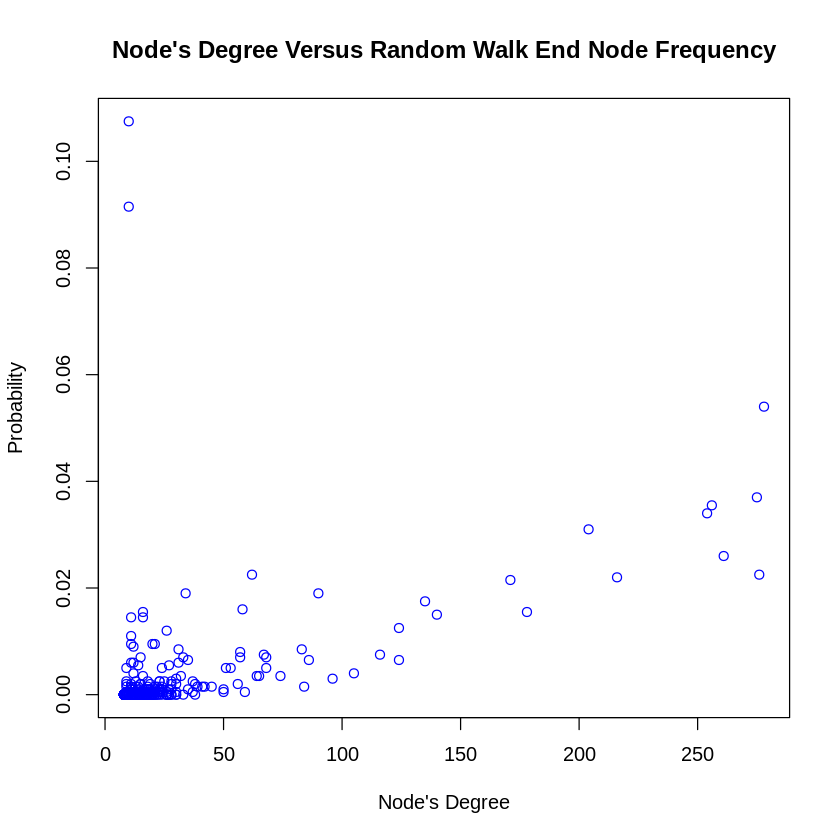

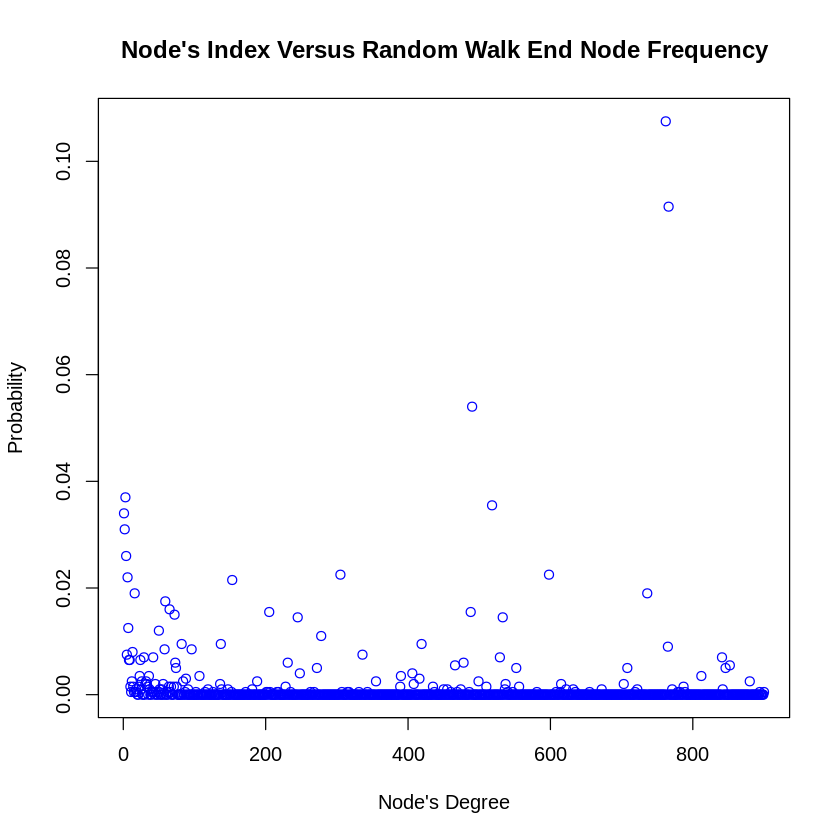

In [8]:
# obtain the page rank of the network
temp_pageRank = as.numeric(unlist(page_rank(networks)))
pageRank = temp_pageRank[1:vcount(networks)]
rankList = sort(pageRank, index.return = TRUE)$ix

# obtain the median two point
medianPoint_1 = rankList[vcount(networks)/2]
medianPoint_2 = rankList[vcount(networks)/2+1]

# initialize the frequency array
freqMap = numeric(vcount(networks))

# initialize the iteration number and step number
iterations = 2000
numberStep = 2000

# caculate the teleportation probability
telePro = numeric(vcount(networks))
telePro[medianPoint_1] = 1/2
telePro[medianPoint_2] = 1/2

for(ii in 1:iterations)
{
  # initialize the start node
  startNode = sample(1:vcount(networks),1)

  # calculate the transition matrix
  transition_matrix = generate_transition_matrix(networks)
  
  # calculate the end node
  endNode = random_walk_pageRank(networks, numberStep, startNode, transition_matrix, telePro, alpha = 0.2)
  
  # calculate the frequancy map
  freqMap[endNode] = freqMap[endNode] + 1
}

# normalize the frequency map the obtain the probability
freqMap = freqMap/iterations

plot(degree(networks), freqMap,main = "Node's Degree Versus Random Walk End Node Frequency", xlab = "Node's Degree", ylab = "Probability", col = 'blue')
plot(seq(from=1, to=vcount(networks), by=1), freqMap,main = "Node's Index Versus Random Walk End Node Frequency", xlab = "Node's Degree", ylab = "Probability", col = 'blue')
